<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Ibm-datascience/blob/main/coffee_sampling_and_estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from os import copy_file_range
coffee_ratings = pd.read_feather('/content/coffee_ratings_full.feather')
print(coffee_ratings.head())

coffee_ratings_df = pd.DataFrame(coffee_ratings)
print(coffee_ratings_df.head())

   total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc       None  metad plc  2014/2015   
1                                 metad plc       None  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch       None       None       None   
3     yidnekachew dabessa coffee plantation       None    wolensu       None   
4                                 metad plc       None  metad plc  2014/2015   

                                 company       altitude  ...  

In [40]:
print(coffee_ratings_df.columns)

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


### total_cup_points vs flavour

In [41]:
points_vs_flavour_population = coffee_ratings_df[['total_cup_points','flavor']]
print(points_vs_flavour_population)

      total_cup_points  flavor
0                90.58    8.83
1                89.92    8.67
2                89.75    8.50
3                89.00    8.58
4                88.83    8.50
...                ...     ...
1333             78.75    7.58
1334             78.08    7.67
1335             77.17    7.33
1336             75.08    6.83
1337             73.75    6.67

[1338 rows x 2 columns]


In [42]:
#sampling the data by randoming selecting subsets
points_vs_flavour_sampling = points_vs_flavour_population.sample(n=10)
print(points_vs_flavour_sampling)

      total_cup_points  flavor
401              83.33    7.75
404              83.33    7.67
953              81.33    7.33
160              84.50    7.92
179              84.33    7.58
950              81.33    7.33
1198             79.00    7.17
1248             77.83    6.83
623              82.67    8.00
1258             77.17    7.00


Population parameter

In [43]:
#series sampling
total_cup_sampling = coffee_ratings_df['total_cup_points'].sample(n=10)
print(total_cup_sampling)

859     81.75
304     83.75
1046    80.75
1079    80.42
1103    80.25
674     82.42
1073    80.50
136     84.67
114     84.92
868     81.75
Name: total_cup_points, dtype: float64


In [44]:
population_parameter = np.mean(points_vs_flavour_population['total_cup_points'])
print(population_parameter)

82.15120328849028


In [45]:
sampling_parameter = np.mean(total_cup_sampling)
print(sampling_parameter)

82.118


In [46]:
#Mean calculations

print(points_vs_flavour_population['flavor'].mean())

print(points_vs_flavour_sampling['flavor'].mean())

7.526046337817639
7.458


# Convenience sampling

In [47]:
#Taking the mean of the total_cup_points
print(coffee_ratings_df['total_cup_points'].mean())

82.15120328849028


In [48]:
#Pick the first 10 coffe ratings
coffee_rating_first10 = coffee_ratings_df.head(10)
print(coffee_rating_first10)

#Taking the mean of the total_cup_points
print(coffee_rating_first10['total_cup_points'].mean())

   total_cup_points  species                        owner country_of_origin  \
0             90.58  Arabica                    metad plc          Ethiopia   
1             89.92  Arabica                    metad plc          Ethiopia   
2             89.75  Arabica     grounds for health admin         Guatemala   
3             89.00  Arabica          yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                    metad plc          Ethiopia   
5             88.83  Arabica                    ji-ae ahn            Brazil   
6             88.75  Arabica                hugo valdivia              Peru   
7             88.67  Arabica  ethiopia commodity exchange          Ethiopia   
8             88.42  Arabica  ethiopia commodity exchange          Ethiopia   
9             88.25  Arabica       diamond enterprise plc          Ethiopia   

                                  farm_name lot_number               mill  \
0                                 metad plc       Non

The discrepancy in mean suggests that coffes with higher ratings are at the top of the dataset

# Visualizing selection bias

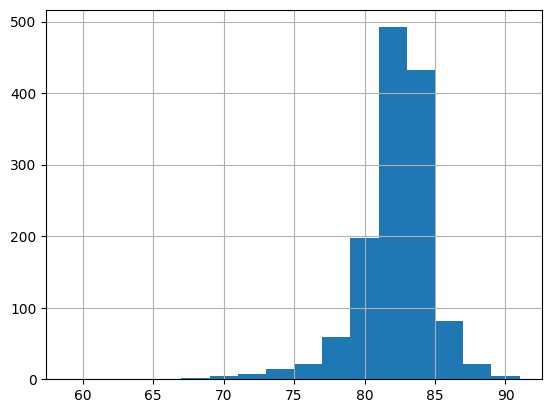

In [49]:
#Population sampling

coffee_ratings_df['total_cup_points'].hist(bins=np.arange(59,93,2))
plt.show()

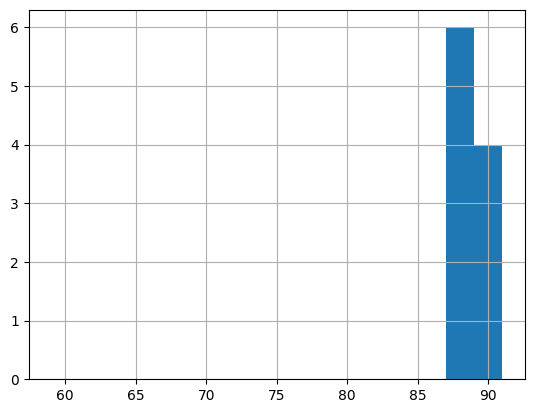

In [50]:
#Convience sampling

coffee_rating_first10['total_cup_points'].hist(bins=np.arange(59,93,2))
plt.show()

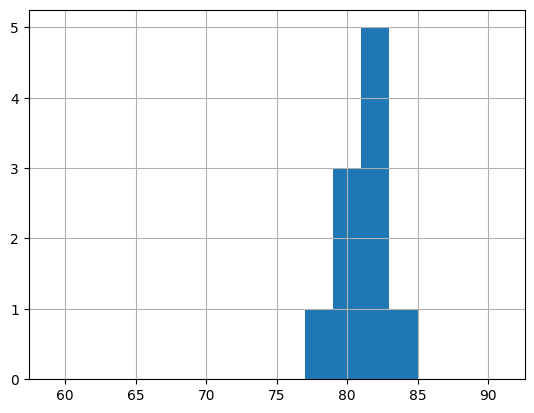

In [51]:
#Random sampling

coffee_rating_random = coffee_ratings_df.sample(n=10)

coffee_rating_random['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

# Simple Random sampling and Systematic Sampling

In [52]:
#Simple random sampling

random_sampling = coffee_ratings_df.sample(n=10, random_state=19000113)
print(random_sampling)

      total_cup_points  species                           owner  \
437              83.25  Arabica  exportadora de cafe condor s.a   
285              83.83  Arabica                 ipanema coffees   
784              82.08  Arabica                   cafe politico   
648              82.58  Arabica  exportadora de cafe condor s.a   
155              84.58  Arabica  exportadora de cafe condor s.a   
987              81.08  Arabica                  gregorio sebba   
495              83.08  Arabica                     chris finch   
1255             77.33  Arabica       israel eduardo paz garcia   
712              82.33  Arabica                 ipanema coffees   
835              81.83  Arabica                 gabriel barbara   

     country_of_origin                 farm_name lot_number  \
437           Colombia                      None       None   
285             Brazil         fazenda rio verde       None   
784           Colombia                      None       None   
648       

In [53]:
#systematic Sampling - Defining the Interval
sample_size = 5
population_size = len(coffee_ratings_df)
print(population_size)

interval = population_size // sample_size #//-Quotient which only gives the whole number and forgets the fraction
print(interval)

1338
267


### To select a systematic sample of 5 samples, i will select every 267th coffee in the dataset

In [54]:
print(coffee_ratings_df.iloc[::interval])

      total_cup_points  species                             owner  \
0                90.58  Arabica                         metad plc   
267              83.92  Arabica  federacion nacional de cafeteros   
534              82.92  Arabica      consejo salvadoreño del café   
801              82.00  Arabica            lin, che-hao krude 林哲豪   
1068             80.50  Arabica          cqi taiwan icp cqi台灣合作夥伴   
1335             77.17  Robusta                       james moore   

     country_of_origin                                     farm_name  \
0             Ethiopia                                     metad plc   
267           Colombia                                          None   
534        El Salvador                                santa josefita   
801             Taiwan  you siang coffee farmtainan, taiwan 台灣台南優香咖啡   
1068            Taiwan                                           王秋金   
1335     United States                               fazenda cazengo   

     lot_nu

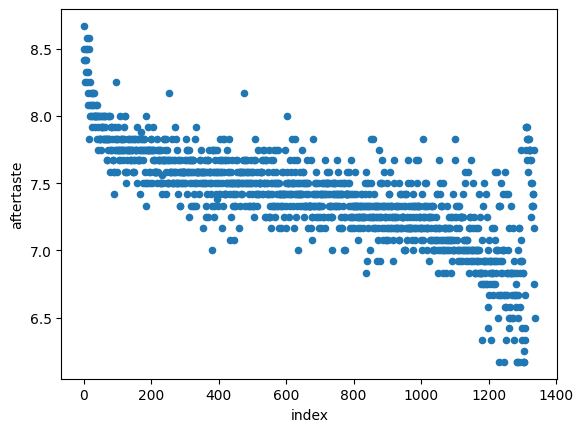

In [55]:
#Visualizing the systematic sampling
coffee_rating_with_id = coffee_ratings_df.reset_index()
coffee_rating_with_id.plot(x='index', y='aftertaste',kind='scatter')
plt.show()

This plot shows that earlier rows has higher aftertaste than the later rows which is a sign of bias making systematic sampling not safe..Systematic sampling is only safe if i dont see a pattern in my scatter plot

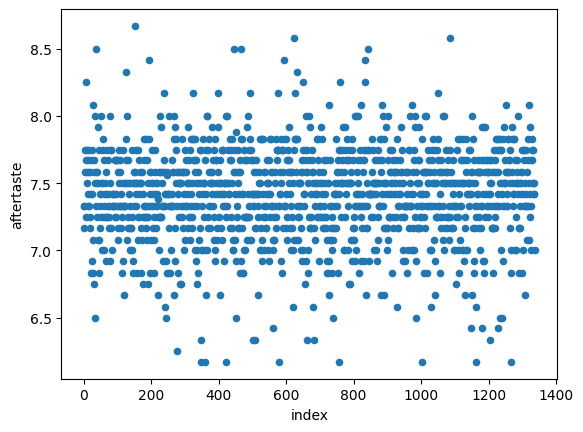

In [56]:
#making systematic sampling safe

shuffled = coffee_ratings_df.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x='index', y='aftertaste',kind='scatter')
plt.show()

# Stratified Sampling - ### sampling a population that contains subgroups

In [57]:
#Grouping the coffee rating by countries

print(coffee_ratings_df['country_of_origin'].value_counts())

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador                     

In [58]:
#Filtering the countries into subgroups
top_coffee_countries = ['Mexico','Colombia','Guatemala','Brazil','Taiwan','United States (Hawaii)']
top_counted_subset = coffee_ratings_df['country_of_origin'].isin(top_coffee_countries)

coffee_rating_top = coffee_ratings_df[top_counted_subset]
print(coffee_rating_top)

      total_cup_points  species                          owner  \
2                89.75  Arabica       grounds for health admin   
5                88.83  Arabica                      ji-ae ahn   
13               87.92  Arabica       grounds for health admin   
22               87.17  Arabica          roberto licona franco   
25               86.92  Arabica                       nucoffee   
...                ...      ...                            ...   
1300             71.00  Arabica  ricardo aaron sampieri marini   
1301             70.75  Arabica                   kurt kappeli   
1302             70.67  Arabica         volcafe ltda. - brasil   
1306             68.33  Arabica       juan carlos garcia lopez   
1309             59.83  Arabica      juan luis alvarado romero   

           country_of_origin                                 farm_name  \
2                  Guatemala  san marcos barrancas "san cristobal cuch   
5                     Brazil                               

### Taking a ten percent of a random sample of the top country subset

In [59]:
#Sample
coffee_rating_country_samp = coffee_rating_top.sample(frac = 0.1, random_state=2021)
print(coffee_rating_country_samp['country_of_origin'].value_counts(normalize=True))

Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: country_of_origin, dtype: float64


###Comparing proportions of samples by the population and sample above

In [60]:
#Full Population
print(coffee_rating_top['country_of_origin'].value_counts(normalize=True))

Mexico                    0.268182
Colombia                  0.207955
Guatemala                 0.205682
Brazil                    0.150000
Taiwan                    0.085227
United States (Hawaii)    0.082955
Name: country_of_origin, dtype: float64


# Proportional Stratified Sampling

In [61]:
coffee_rating_strat = coffee_rating_top.groupby('country_of_origin').sample(frac=0.1,random_state=2021)
print(coffee_rating_strat['country_of_origin'].value_counts(normalize=True))

Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64


## Equal counts stratified sampling

In [62]:
coffee_rating_eq = coffee_rating_top.groupby('country_of_origin').sample(n=15,random_state=2021)
print(coffee_rating_eq['country_of_origin'].value_counts(normalize=True))

Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64


# Weighted Random Sampling

In [63]:
coffee_rating_weight = coffee_rating_top
condition = coffee_rating_weight['country_of_origin'] =='Taiwan'
coffee_rating_weight['Weight'] = np.where(condition, 2, 1)
coffee_rating_weight = coffee_rating_weight.sample(frac=0.1, weights='Weight')
print(coffee_rating_weight['country_of_origin'].value_counts(normalize=True))

Mexico                    0.261364
Colombia                  0.193182
Taiwan                    0.170455
Brazil                    0.147727
Guatemala                 0.125000
United States (Hawaii)    0.102273
Name: country_of_origin, dtype: float64


<ipython-input-63-7b725a6b3424>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_rating_weight['Weight'] = np.where(condition, 2, 1)


# Cluster Sampling

In [64]:
#varieties of coffe
coffee_variety_pop = list(coffee_ratings_df['variety'].unique())
print(coffee_variety_pop)

[None, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe', 'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona', 'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica', 'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas', 'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms', 'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe', 'Pache Comun']


stage 1: sampling for subgroups

In [65]:
import random
coffee_variety_sample = random.sample(coffee_variety_pop,k=3)
print(coffee_variety_sample)

['Pache Comun', 'Moka Peaberry', 'SL34']


stage 2: sampling each subgroup

In [66]:
coffee_ratings_df['variety']= coffee_ratings_df['variety'].astype('category')
variety_condition = coffee_ratings_df['variety'].isin(coffee_variety_sample)
coffee_cluster = coffee_ratings_df[variety_condition]

coffee_cluster['variety'] = coffee_cluster['variety'].cat.remove_unused_categories()
coffee_cluster_ratings = coffee_cluster.groupby('variety').sample(n=5,random_state=2021,replace=True)
print(coffee_cluster_ratings)

     total_cup_points  species                                       owner  \
543             82.92  Arabica  expocaccer coop dos cafeic do cerrado ltda   
543             82.92  Arabica  expocaccer coop dos cafeic do cerrado ltda   
543             82.92  Arabica  expocaccer coop dos cafeic do cerrado ltda   
543             82.92  Arabica  expocaccer coop dos cafeic do cerrado ltda   
543             82.92  Arabica  expocaccer coop dos cafeic do cerrado ltda   
989             81.08  Arabica                                    wali ali   
989             81.08  Arabica                                    wali ali   
989             81.08  Arabica                                    wali ali   
989             81.08  Arabica                                    wali ali   
989             81.08  Arabica                                    wali ali   
121             84.75  Arabica                               lydiah mwangi   
144             84.58  Arabica                               jun

<ipython-input-66-93bf1fbe7956>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_cluster['variety'] = coffee_cluster['variety'].cat.remove_unused_categories()


# Relative error of point estimates

In [67]:
coffee_population_mean = coffee_ratings_df['total_cup_points'].mean()

coffee_sample_mean = coffee_ratings_df.sample(n=sample_size)['total_cup_points'].mean()

#Relative Error

rel_error = 100 * abs(coffee_population_mean - coffee_sample_mean)/ coffee_population_mean
print(rel_error)

1.5834177217608274


#Creating a Sampling Distribution

In [68]:
#Same code a 1000 times

mean_cup_points_1000 = []
for i in range(1000):
  mean_cup_points_1000.append(coffee_ratings_df.sample(n=1000)['total_cup_points'].mean())
print(mean_cup_points_1000)

[82.10076000000001, 82.09123, 82.10598000000002, 82.10470000000001, 82.21683, 82.13056, 82.17084, 82.1127, 82.13968, 82.21956, 82.07715, 82.09785000000001, 82.19035000000001, 82.14401000000001, 82.16261999999999, 82.11453, 82.07581, 82.13949000000001, 82.18887, 82.07999, 82.19121, 82.09895999999999, 82.18128999999999, 82.08655999999999, 82.12859, 82.14647000000001, 82.16882000000001, 82.13852, 82.06701000000001, 82.17564, 82.24822999999999, 82.12275, 82.13752000000001, 82.15602, 82.18288000000001, 82.12985999999998, 82.16153, 82.19273000000001, 82.20183999999999, 82.15008, 82.09506, 82.10990999999999, 82.1544, 82.17042, 82.14667999999999, 82.17681000000002, 82.21658000000001, 82.1547, 82.25138000000001, 82.20467000000001, 82.18296000000001, 82.20605, 82.12760999999999, 82.09352, 82.18498000000001, 82.17213000000001, 82.16829000000001, 82.18877, 82.20651000000001, 82.14871000000001, 82.14240000000001, 82.1391, 82.15404999999998, 82.23934, 82.12902, 82.10951000000001, 82.14117999999999, 

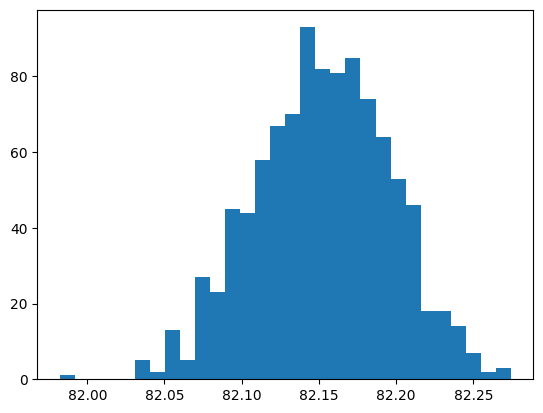

In [69]:
#Visualization
plt.hist(mean_cup_points_1000,bins=30)
plt.show()

Interpretation: most of the results lie between eighty-one and eighty-three, and they roughly follow a bell-shaped curve, like a normal distribution

# Standard deviation

In [70]:
#For the whole population
std_population = coffee_ratings_df['total_cup_points'].std(ddof=0)
print(std_population)

2.685858187306438


In [71]:
#For samples 5,40,80,320
std_sample = coffee_ratings_df['total_cup_points'].sample(n=5, random_state=2022).std(ddof=1)
print(std_sample)

3.1280473142201655


In [72]:
std_sample_40 = coffee_ratings_df['total_cup_points'].sample(n=40, random_state=42).std(ddof=1)
print(std_sample_40)

2.5930215890999553


In [73]:
std_sample_80 = coffee_ratings_df['total_cup_points'].sample(n=80, random_state=2022).std(ddof=1)
print(std_sample_80)

3.0028042563408515


In [74]:
std_sample_320 = coffee_ratings_df['total_cup_points'].sample(n=320, random_state=2022).std(ddof=1)
print(std_sample_320)

2.8644201483110256


# Bootstrapping

In [75]:
#Boot strapping coffee flavours
resample = coffee_ratings_df.sample(frac=1,replace=True) #making a resample of the same size as original data

np.mean(coffee_ratings_df.sample(frac=1,replace=True)['flavor']) #Calculating the mean(statistics)

#Repeating the process above 1000 times
mean_flavors_1000 = []
for i in range(1000):
  mean_flavors_1000.append(np.mean(coffee_ratings_df.sample(frac=1,replace=True)['flavor']))

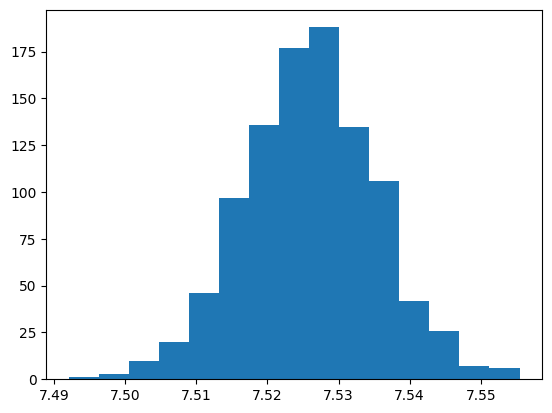

In [77]:
#visualize

plt.hist(mean_flavors_1000, bins =15)
plt.show()